In [19]:
import pandas as pd
from functools import reduce
import proplot as pplt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import requests
import io

import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


Emission_CO2 = pd.read_csv("https://raw.githubusercontent.com/Firzanomist/Agriculture/712b8155394a016716320b2112858644a8b60187/Environment_Emissions_intensities_E_Asia_NOFLAG.csv")
Land_Use = pd.read_csv("https://raw.githubusercontent.com/Firzanomist/Agriculture/712b8155394a016716320b2112858644a8b60187/Inputs_LandUse_E_Asia_NOFLAG.csv", encoding= 'unicode_escape')
Agriculture_Production = pd.read_csv("https://raw.githubusercontent.com/Firzanomist/Agriculture/712b8155394a016716320b2112858644a8b60187/Environment_Emissions_intensities_E_Asia_NOFLAG.csv")
Macro_Indicators = pd.read_csv("https://raw.githubusercontent.com/Firzanomist/Agriculture/712b8155394a016716320b2112858644a8b60187/Macro-Statistics_Key_Indicators_E_Asia_NOFLAG.csv", encoding= 'unicode_escape')
Forestry_Industry = pd.read_csv("https://raw.githubusercontent.com/Firzanomist/Agriculture/712b8155394a016716320b2112858644a8b60187/Forestry_E_Asia_NOFLAG.csv")

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
0,2,Afghanistan,1877,Forest products (export/import),5622,Import Value,1000 US$,NaN,NaN,NaN,...,129267.0,127306.0,106777.0,105516.0,95617.0,84509.0,96120.0,102693.0,67865.0,77207.0
1,2,Afghanistan,1877,Forest products (export/import),5922,Export Value,1000 US$,NaN,NaN,NaN,...,8130.0,6647.0,6640.0,3619.0,3825.0,4574.0,3134.0,3931.0,3604.0,1163.0
2,2,Afghanistan,1861,Roundwood,5516,Production,m3,1354291.0,1371568.0,1414937.0,...,3415317.0,3453939.0,3485812.0,3518409.0,3551747.0,3583797.0,3616559.0,3650051.0,3684292.0,3719300.0
3,2,Afghanistan,1861,Roundwood,5616,Import Quantity,m3,NaN,NaN,NaN,...,100.0,559.0,118.0,43.0,20.0,464.0,146.0,1548.0,1658.0,1253.0
4,2,Afghanistan,1861,Roundwood,5622,Import Value,1000 US$,NaN,NaN,NaN,...,60.0,91.0,64.0,26.0,11.0,166.0,33.0,157.0,109.0,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15567,249,Yemen,1622,Other papers mainly for packaging,5922,Export Value,1000 US$,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15568,249,Yemen,1683,Other paper and paperboard n.e.s. (not elsewhe...,5610,Import Quantity,tonnes,200.0,800.0,200.0,...,1156.0,2368.0,1067.0,1715.0,686.0,686.0,686.0,686.0,1901.0,853.0
15569,249,Yemen,1683,Other paper and paperboard n.e.s. (not elsewhe...,5622,Import Value,1000 US$,100.0,364.0,100.0,...,4159.0,9584.0,4314.0,6297.0,2675.0,2675.0,2675.0,2675.0,741.0,2711.0
15570,249,Yemen,1683,Other paper and paperboard n.e.s. (not elsewhe...,5910,Export Quantity,tonnes,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [20]:
# Filter to get Indonesia data
Indo_ECO2 = Emission_CO2[Emission_CO2["Area"] == "Indonesia"]
Indo_LU = Land_Use[Land_Use["Area"] == 'Indonesia']
Indo_AP = Agriculture_Production[Agriculture_Production["Area"] == "Indonesia"]
Indo_MI = Macro_Indicators[Macro_Indicators["Area"] == 'Indonesia']
Indo_FE = Forestry_Industry[Forestry_Industry["Area"] == 'Indonesia']

In [21]:
# Delete not important columns
Indo_ECO2_del = Indo_ECO2.T.drop(labels = ["Area Code", "Item Code", "Element Code"])
Indo_LU_del = Indo_LU.T.drop(labels = ["Area Code",  "Area Code (M49)", "Item Code", "Element Code"])
Indo_AP_del = Indo_AP.T.drop(labels = ["Area Code", "Item Code", "Element Code"])
Indo_MI_del = Indo_MI.T.drop(labels = ["Area Code", "Area Code (M49)", "Item Code", "Element Code"])
Indo_FE_del = Indo_FE.T.drop(labels = ["Area Code", "Item Code", "Element Code"])

In [22]:
# Seperate Y and Year in each columns
Indo_ECO2_I = Indo_ECO2_del.T
Indo_LU_I = Indo_LU_del.T
Indo_AP_I = Indo_AP_del.T
Indo_MI_I = Indo_MI_del.T
Indo_FE_I = Indo_FE_del.T

Indo_ECO2_I["id"] = Indo_ECO2_I.index
Indo_LU_I["id"] = Indo_LU_I.index
Indo_AP_I["id"] = Indo_AP_I.index
Indo_MI_I["id"] = Indo_MI_I.index
Indo_FE_I["id"] = Indo_FE_I.index

Indo_ECO2_Year = pd.wide_to_long(Indo_ECO2_I, ["Y"], i = "id", j = "Year")
Indo_LU_Year = pd.wide_to_long(Indo_LU_I, ["Y"], i = "id", j = "Year")
Indo_AP_Year = pd.wide_to_long(Indo_AP_I, ["Y"], i = "id", j = "Year")
Indo_MI_Year = pd.wide_to_long(Indo_MI_I, ["Y"], i = "id", j = "Year")
Indo_FE_Year = pd.wide_to_long(Indo_FE_I, ["Y"], i = "id", j = "Year")

In [23]:
# Replace Y column with new name to make varibles   
Indo_ECO2_Year.columns = Indo_ECO2_Year.columns.str.replace("Y", "Emissions CO2(gigagrams)")
Indo_LU_Year.columns = Indo_LU_Year.columns.str.replace("Y", "Land_Use_to_Agriculture(1000)ha")
Indo_AP_Year.columns = Indo_AP_Year.columns.str.replace("Y", "Agriculture Production(Tonnes)")
Indo_MI_Year.columns = Indo_MI_Year.columns.str.replace("Y", 'Value_add_Agri_forest_fish(US$ Millions)')
Indo_FE_Year.columns = Indo_FE_Year.columns.str.replace("Y", "Forestry_Industry(Tonnes)")

In [24]:
# Filter again to get specific data  
Indo_ECO2_Unit = Indo_ECO2_Year[Indo_ECO2_Year["Unit"] == "gigagrams"]
Indo_LU_Agr = Indo_LU_Year[(Indo_LU_Year.Item == "Agriculture") |
                           (Indo_LU_Year.Item == "Agricultural land") |
                           (Indo_LU_Year.Item == "Cropland") |
                           (Indo_LU_Year.Item == "Arable land") |
                           (Indo_LU_Year.Item == "Land under permanent crops") |
                           (Indo_LU_Year.Item == "Other land")]
                           
Indo_AP_Unit = Indo_AP_Year[Indo_AP_Year['Unit'] == "tonnes"]
Indo_MI_Value_add = Indo_MI_Year[Indo_MI_Year["Item"] == "Value Added (Agriculture, Forestry and Fishing)"]
Indo_MI_Value_US = Indo_MI_Value_add[Indo_MI_Value_add["Element"] == "Value US$, 2015 prices"]
Indo_FE_Production = Indo_FE_Year[(Indo_FE_Year.Element == "Production") & (Indo_FE_Year.Unit == "tonnes")]

In [25]:
# Group columns to get accumulations data based on Year 
Indo_ECO2_agg = Indo_ECO2_Unit.groupby(["Year", "Area", "Unit"]).sum().reset_index()
Indo_LU_Agr_agg = Indo_LU_Agr.groupby(["Year", "Area", "Unit"]).sum().reset_index()
Indo_AP_agg = Indo_AP_Unit.groupby(["Year", "Area", "Unit"]).sum().reset_index()
Indo_MI_Value_I = Indo_MI_Value_US.reset_index("Year")
Indo_FE_Production_agg = Indo_FE_Production.groupby(["Year", "Area", "Unit"]).sum().reset_index()

In [26]:
# Make dataframe with "Year" and "variables" columns
Indo_ECO2_agg_Y = Indo_ECO2_agg[["Year", "Emissions CO2(gigagrams)"]]
Indo_LU_Agr_agg_Y = Indo_LU_Agr_agg[["Year", "Land_Use_to_Agriculture(1000)ha"]]
Indo_AP_agg_Y = Indo_AP_agg[["Year", "Agriculture Production(Tonnes)"]]
Indo_MI_Value_Y = Indo_MI_Value_I[["Year", "Value_add_Agri_forest_fish(US$ Millions)"]]
Indo_FE_Production_agg_Y = Indo_FE_Production_agg[["Year", "Forestry_Industry(Tonnes)"]]

In [27]:
# Change "Year" column become index
Indo_ECO2_agg_T = Indo_ECO2_agg_Y.set_index(["Year"])
Indo_LU_Agr_agg_T = Indo_LU_Agr_agg_Y.set_index(["Year"])
Indo_AP_agg_T = Indo_AP_agg_Y.set_index(["Year"])
Indo_MI_Value_T = Indo_MI_Value_Y.set_index(["Year"])
Indo_FE_Production_agg_T = Indo_FE_Production_agg_Y.set_index(["Year"])

In [28]:
# Choose index from 1970 until 2017 to get value in all variables, because different rows in each dataFrame  
Indo_ECO2_agg_Table =  Indo_ECO2_agg_T.loc[1970:2017]
Indo_LU_Agr_agg_Table = Indo_LU_Agr_agg_T.loc[1970:2017]
Indo_AP_agg_Table = Indo_AP_agg_T.loc[1970:2017]
Indo_MI_Value_Table = Indo_MI_Value_T.loc[1970:2017]
Indo_FE_Production_agg_Table = Indo_FE_Production_agg_T.loc[1970:2017]

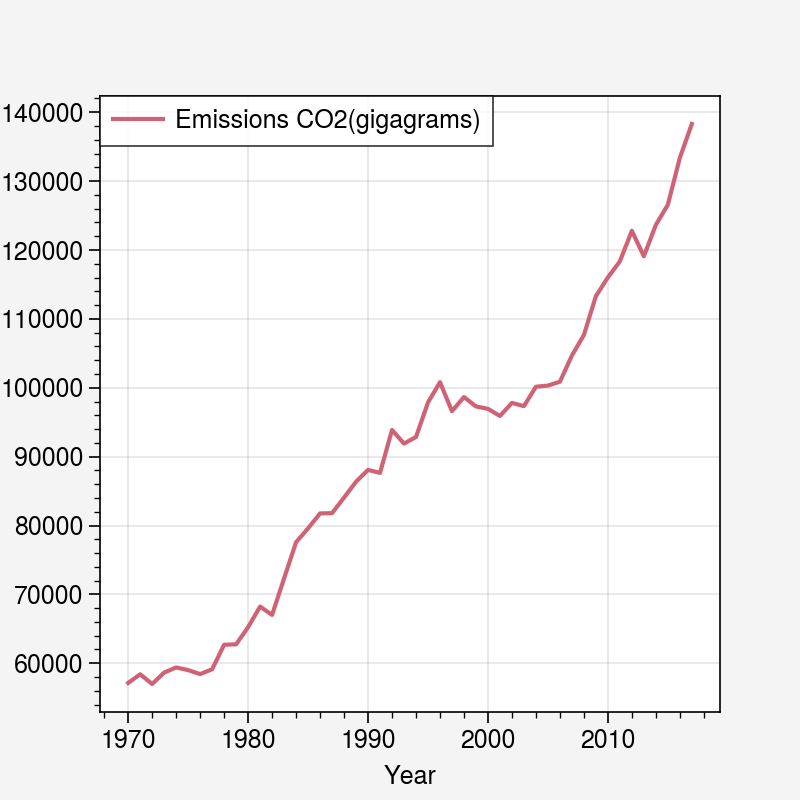

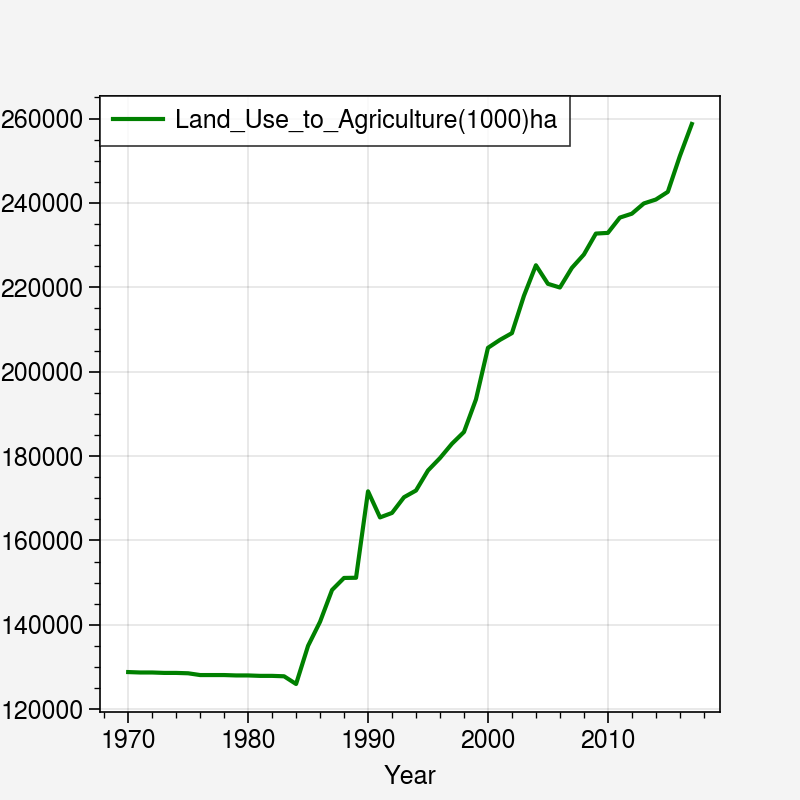

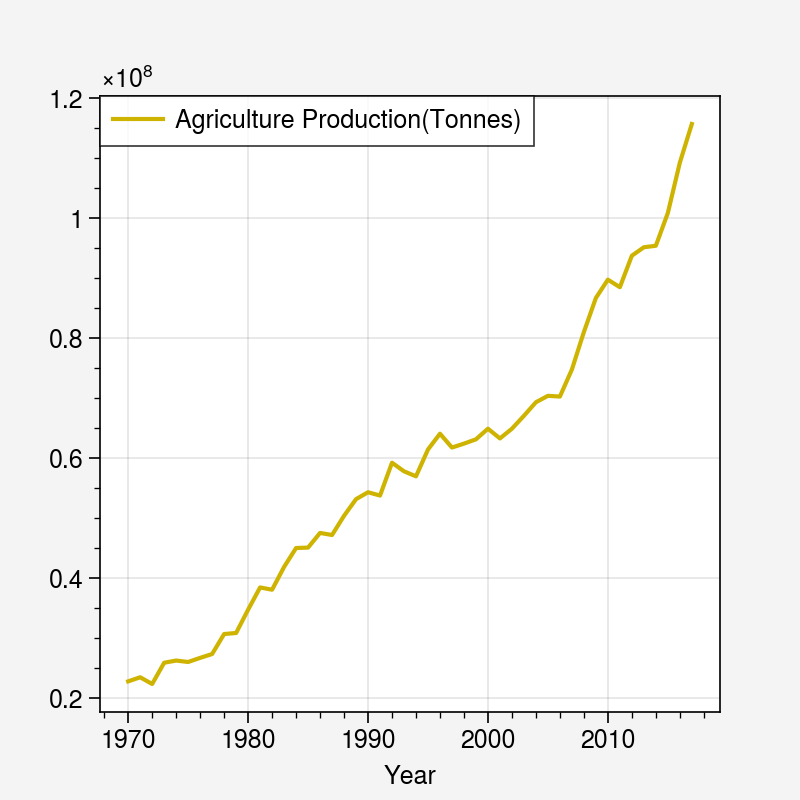

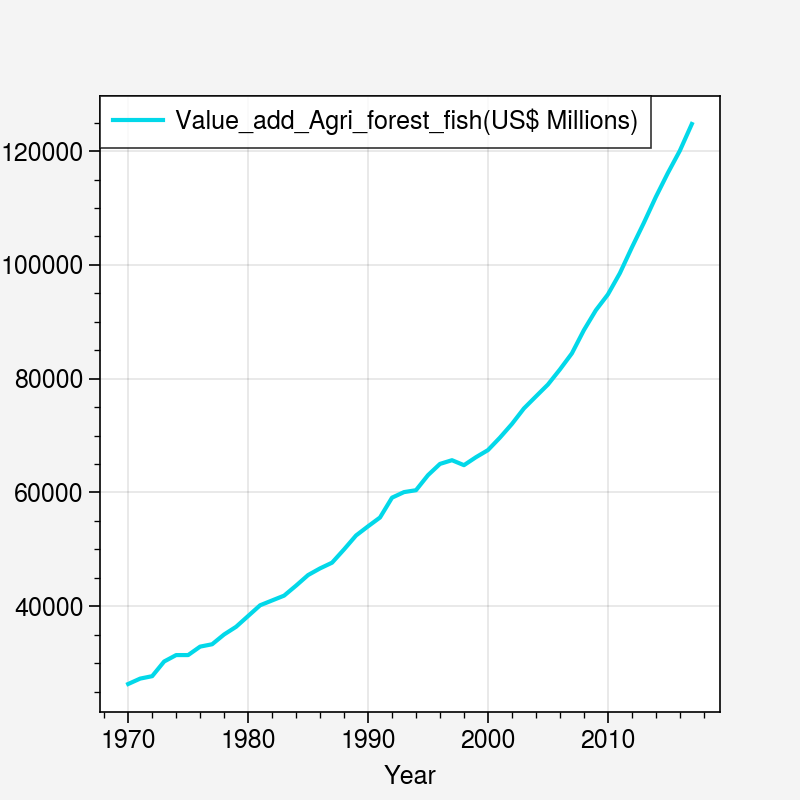

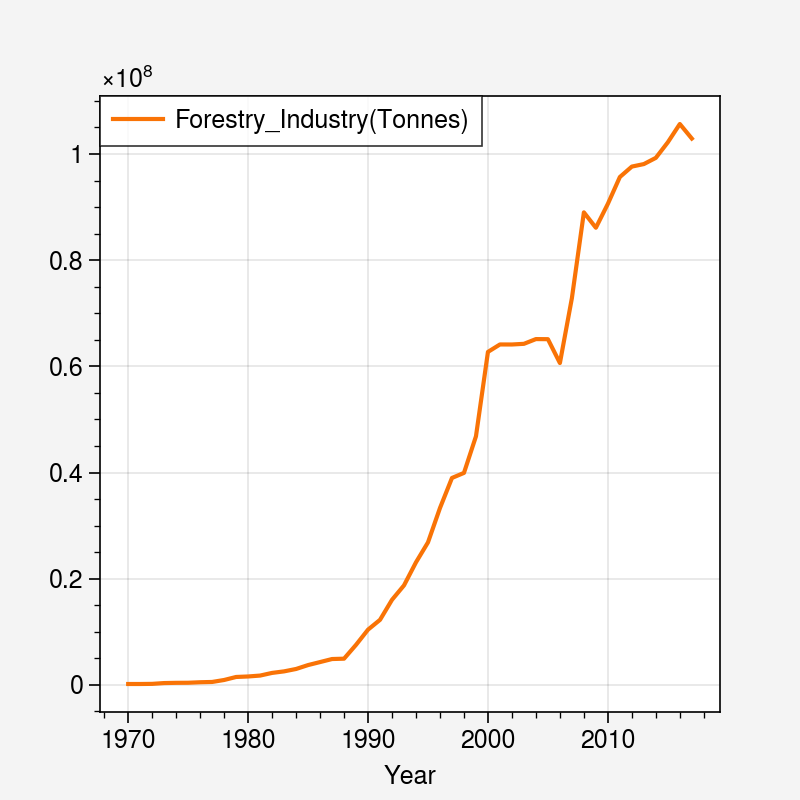

In [29]:
# Visualize each variables in DataFrame
Indo_ECO2_agg_Table.plot(kind = "line", color ="rose")
Indo_LU_Agr_agg_Table.plot(kind = "line", color ="green")
Indo_AP_agg_Table.plot(kind = "line", color ="mustard")
Indo_MI_Value_Table.plot(kind = "line", color ="aqua blue")
Indo_FE_Production_agg_Table.plot(kind = "line", color ="orange")
pplt.show()

In [30]:
# Merge all variables in one DataFrame and change value to integer 
Indo_Table = [Indo_ECO2_agg_Table, Indo_LU_Agr_agg_Table, Indo_AP_agg_Table, Indo_MI_Value_Table, Indo_FE_Production_agg_Table]
Indo_Table_Merge = reduce(lambda  left,right: pd.merge(left,right,on=['Year'], how='outer'), Indo_Table)

Indo_Table_Int = Indo_Table_Merge.astype(int)
Indo_Table_Int

,Emissions CO2(gigagrams),Land_Use_to_Agriculture(1000)ha,Agriculture Production(Tonnes),Value_add_Agri_forest_fish(US$ Millions),Forestry_Industry(Tonnes)
Year,,,,,
1970,57137,128800,22792042,26332,178236
1971,58402,128700,23474795,27282,178618
1972,56986,128700,22353655,27707,203136
1973,58646,128600,25897108,30289,354582
1974,59389,128600,26261715,31417,398141
1975,59003,128512,26024182,31417,412306
1976,58427,128092,26707773,32904,507789
1977,59125,128092,27351668,33318,562730
1978,62685,128092,30683421,35039,934080


In [31]:
# Make Linear Regression Model
x_var = Indo_Table_Int[["Land_Use_to_Agriculture(1000)ha", "Agriculture Production(Tonnes)",
                         "Value_add_Agri_forest_fish(US$ Millions)", "Forestry_Industry(Tonnes)"]]
y_var = Indo_Table_Int["Emissions CO2(gigagrams)"]

x = sm.add_constant(x_var)
model = sm.OLS(y_var, x).fit()
predictions = model.predict(x)
print_model = model.summary()
root = tk.Tk()
root.title('OLS Linear Regression')

label_Linear_Regression = tk.Label(root, text=model.summary(), justify = "center", font=('Consolas', 10))
label_Linear_Regression.place(relx = 0.5, rely = 0.5, anchor = 'center')
root.mainloop()

In [32]:
# Create Variance_inflation_factor(VIF) to multicollinearity check
multicollinearity = Indo_Table_Int[["Emissions CO2(gigagrams)", "Land_Use_to_Agriculture(1000)ha",
                            "Agriculture Production(Tonnes)", "Value_add_Agri_forest_fish(US$ Millions)",
                            "Forestry_Industry(Tonnes)"]]

vif_data = pd.DataFrame()
vif_data["feature"] = multicollinearity.columns
vif_data["VIF"] =[variance_inflation_factor(multicollinearity.values, i)
                  for i in range(len(multicollinearity.columns))]
vif_data

,feature,VIF
0,Emissions CO2(gigagrams),-1.965193e+00
1,Land_Use_to_Agriculture(1000)ha,2.692772e-01
2,Agriculture Production(Tonnes),7.621885e-06
3,Value_add_Agri_forest_fish(US$ Millions),-1.608449e+00
4,Forestry_Industry(Tonnes),4.851109e-07


In [33]:
# Create again Linear Regression Model after multicollinearity check
x_var = Indo_Table_Int[["Land_Use_to_Agriculture(1000)ha", "Value_add_Agri_forest_fish(US$ Millions)"]]
y_var = Indo_Table_Int["Emissions CO2(gigagrams)"]

x = sm.add_constant(x_var)
model = sm.OLS(y_var, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Emissions CO2(gigagrams)   R-squared:                       0.958
Model:                                  OLS   Adj. R-squared:                  0.956
Method:                       Least Squares   F-statistic:                     515.2
Date:                      Wed, 31 Aug 2022   Prob (F-statistic):           9.71e-32
Time:                              23:37:40   Log-Likelihood:                -472.59
No. Observations:                        48   AIC:                             951.2
Df Residuals:                            45   BIC:                             956.8
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     3.707e+04   4828.869      7.677      0.000    2.73e+04    4.68e+04
Land_Use_to_Agriculture(1000)ha              0.0220      0.058      0.378      0.707      -0.095       0.139
Value_add_Agri_forest_fish(US$ Millions)     0.7732      0.096      8.081      0.000       0.581       0.966
==============================================================================
Omnibus:                       11.510   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                3.574
Skew:                           0.305   Prob(JB):                        0.167
Kurtosis:                       1.811   Cond. No.                     1.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#Applications Statsmodels OLS Linear Regression in Tkinter
x_var = Indo_Table_Int[["Land_Use_to_Agriculture(1000)ha", "Value_add_Agri_forest_fish(US$ Millions)"]]
y_var = Indo_Table_Int["Emissions CO2(gigagrams)"]

x = sm.add_constant(x_var)
model = sm.OLS(y_var, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

root = tk.Tk()
root.title('OLS Linear Regression')

label_Linear_Regression = tk.Label(root, text=model.summary(), justify = "center", font=('Consolas', 10))
label_Linear_Regression.place(relx = 0.5, rely = 0.5, anchor = 'center')
root.mainloop()

                               OLS Regression Results                               
Dep. Variable:     Emissions CO2(gigagrams)   R-squared:                       0.958
Model:                                  OLS   Adj. R-squared:                  0.956
Method:                       Least Squares   F-statistic:                     515.2
Date:                      Wed, 31 Aug 2022   Prob (F-statistic):           9.71e-32
Time:                              23:38:07   Log-Likelihood:                -472.59
No. Observations:                        48   AIC:                             951.2
Df Residuals:                            45   BIC:                             956.8
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------